In [ ]:
from google.colab import drive 
drive.mount('Colab_Notebooks')

Mounted at Colab_Notebooks


In [ ]:
#import pandas package
import pandas as pd
#load csv data into pandas dataframe
import numpy as np
#filtering stopwords
df=pd.read_csv('/content/Colab_Notebooks/MyDrive/2021.csv')
tweets=''
for tweet in df['tweet']:
  tweets += tweet + ' '
tweets

"@roshanpateI 🤣 $7 @tesla_raj Many UI improvements coming @CSmithson80 @heydave7 @BLKMDL3 @mims This chart is a big deal @BLKMDL3 @mims Predicting macroeconomics is challenging, to say the least. My gut feel is maybe around spring or summer 2022, but not later than 2023. @mims If history is any guide, not many will make it past the next recession @waitbutwhy 💯🙏 @T_Ball5 Probably not wrong @heydave7 🤔  https://t.co/OCUqr6xd9d  https://t.co/mVhCpxVPZI @PPathole I do @GailAlfarATX @SawyerMerritt Wow, working on this problem has soaked up a lot of my time &amp; brain cycles over the past ~7 years! This and Starship engines are currently the two hardest problems. @SawyerMerritt Ashok was the first person recruited from my tweet saying that Tesla is starting an Autopilot team! @esprit_tesla @chazman @lexfridman Yes @risermaker @engineers_feed ~700nm to ~400nm @SirineAti @engineers_feed FAA approval is the schedule driver. Their latest update says end of February. Lex asks great questions @cl

1.Compute word frequencies for each year. Exclude the stop words

In [ ]:
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('word_tokenize')
all_words = word_tokenize(tweets)
stop_words = set(stopwords.words('english'))
stop_words.update(['@', ',', 'A', '.', ':', ';', '&', 'I', '!', '’', ')', '(', '🤣', '?', 'The', '“', '”',"💯🙏",'We', 'In', 'It',"🤔 " 'This', 'If'])
filtered_words = []
for word in all_words:
    if word not in stop_words:
        filtered_words.append(word)

word_analysis = nltk.FreqDist(filtered_words)
word_analysis.items()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


dict_items([('roshanpateI', 1), ('$', 42), ('7', 4), ('tesla_raj', 10), ('Many', 8), ('UI', 2), ('improvements', 18), ('coming', 35), ('CSmithson80', 1), ('heydave7', 19), ('BLKMDL3', 22), ('mims', 3), ('This', 93), ('chart', 3), ('big', 28), ('deal', 7), ('Predicting', 1), ('macroeconomics', 1), ('challenging', 2), ('say', 17), ('least', 19), ('My', 18), ('gut', 1), ('feel', 11), ('maybe', 19), ('around', 19), ('spring', 1), ('summer', 6), ('2022', 10), ('later', 23), ('2023', 4), ('history', 15), ('guide', 1), ('many', 46), ('make', 61), ('past', 13), ('next', 55), ('recession', 3), ('waitbutwhy', 13), ('T_Ball5', 1), ('Probably', 25), ('wrong', 8), ('🤔', 3), ('https', 320), ('//t.co/OCUqr6xd9d', 1), ('//t.co/mVhCpxVPZI', 1), ('PPathole', 116), ('GailAlfarATX', 7), ('SawyerMerritt', 42), ('Wow', 17), ('working', 19), ('problem', 25), ('soaked', 1), ('lot', 41), ('time', 77), ('amp', 476), ('brain', 9), ('cycles', 1), ('~7', 2), ('years', 41), ('Starship', 62), ('engines', 31), ('curr

2.Show top 10 words (for each year) by the highest value of word frequency

In [ ]:
word_analysis.tabulate(10)

           amp          Tesla          https         SpaceX  WholeMarsBlog  teslaownersSV       PPathole Erdayastronaut             🤣🤣           This 
           476            327            320            236            189            119            116            111             94             93 


3.Plot histogram of word frequencies for each year

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


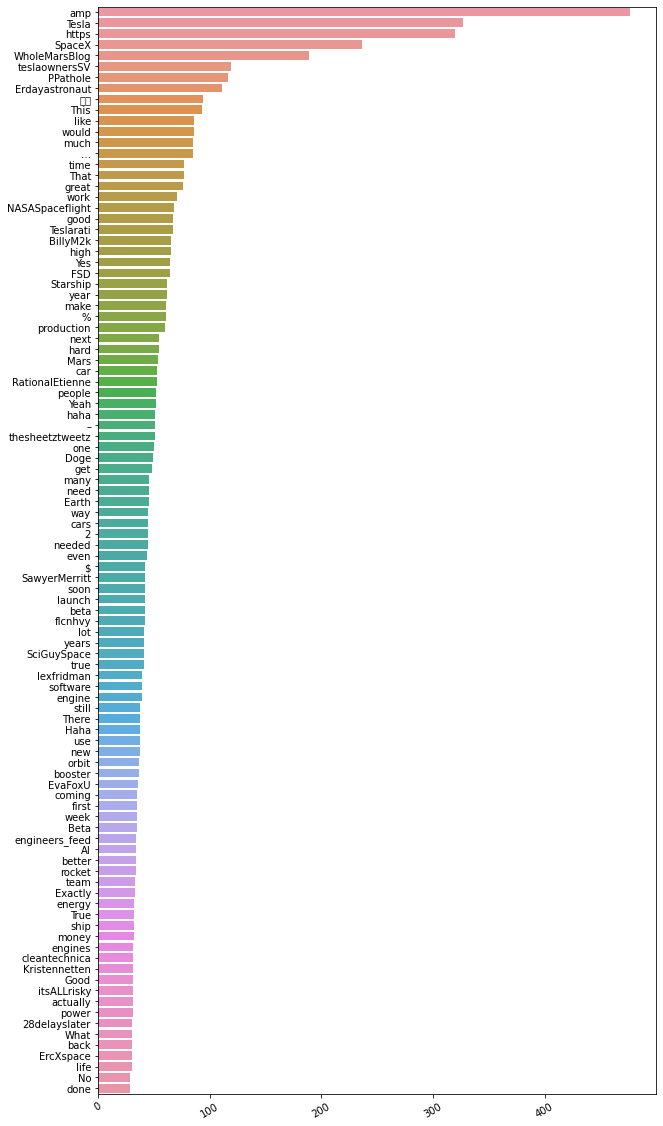

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
word_analysis_data_series = pd.Series(dict(word_analysis.most_common(100)))
# word_analysis_data_series = pd.Series(dict(word_analysis))

fig, ax = plt.subplots(figsize=(10,20))

word_frequency_plot = sns.barplot(y=word_analysis_data_series.index, x=word_analysis_data_series.values, ax=ax)
plt.xticks(rotation=30);

4.Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

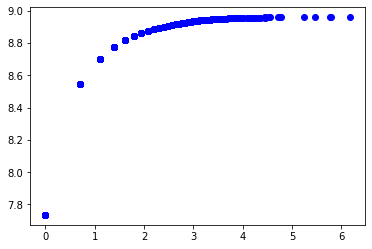

In [ ]:
import scipy.stats as ss
import math
word_rank = ss.rankdata([freq for freq in word_analysis.values()])
log_freq = [math.log(freq) for freq in word_analysis.values()]
log_rank = [math.log(rank) for rank in word_rank]
plt.plot(log_freq, log_rank, 'bo')

5.Create bigram network graphs for each year

In [ ]:
bigram_words = list(nltk.bigrams(filtered_words))
bigram_word_analysis = nltk.FreqDist(bigram_words)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127873 missing from current font.
  fon

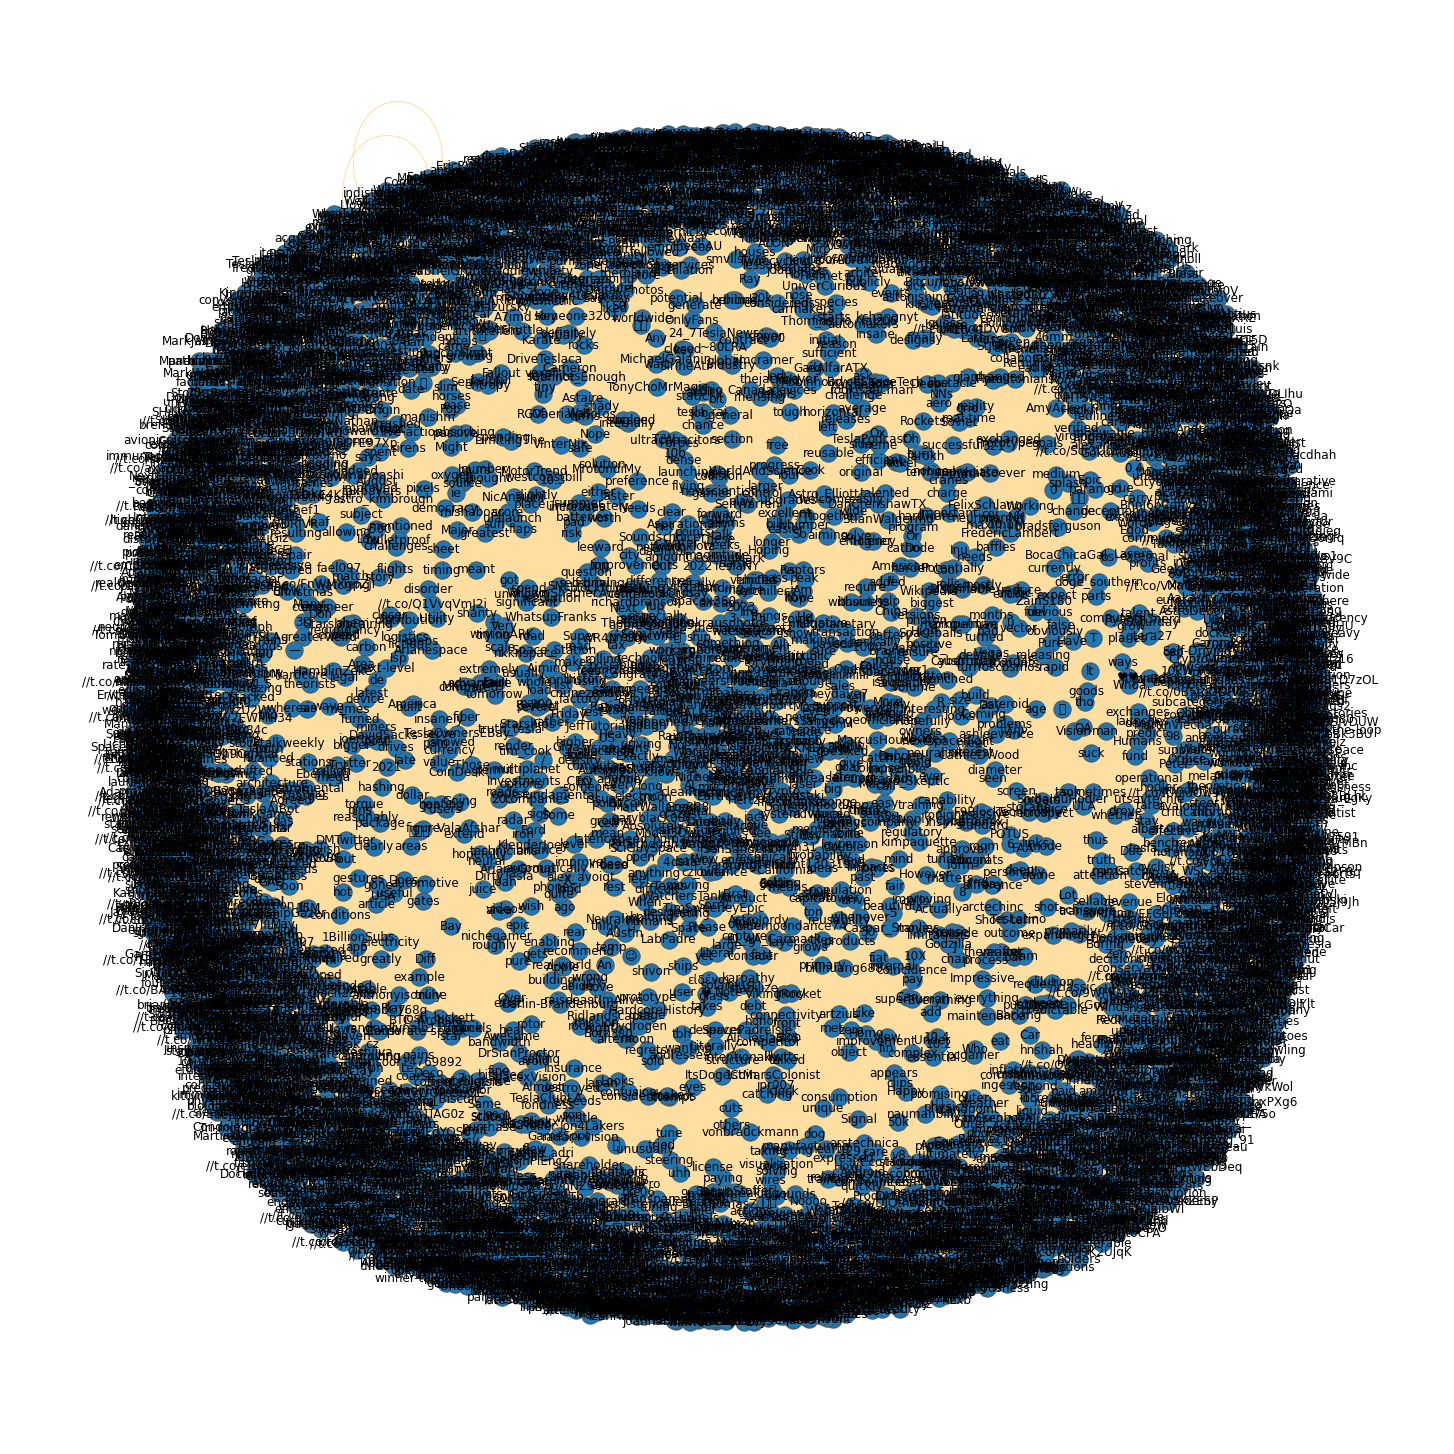

In [ ]:
import networkx as nx
G = nx.Graph()
for index, row in bigram_word_analysis.most_common():
  G.add_weighted_edges_from([(index[0], index[1], row)])  

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=30), **options)
# nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50))
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()